Selectivity Post Analysis.

-Calculating Ratio. 

-plotting Ratio

# Calculating relative permeabilities
DeltaErev(deltaE)  = ErevB-RevA = RT/zF ln PB[B]o/PA[A]o

to get rid of ln: and [Bo]/B[A] = 1

e(deltaE * zf/RT) = PB/PA (zf/RT = 1/25.26)

=1/EXP(deltaE*1000/25.6*-1) (Why - 1 again?)


In [84]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

In [85]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity


In [86]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity'

In [87]:
#filedir ='C:/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/' #windows
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirManuscriptStat ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Statistics/'

#root = tk.Tk()
#root.withdraw() not sure if becessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
filename = 'SummaryVrev.xlsx'
#filename = filedialog.askopenfilename()
#root.update() # necessary in Mac(?) to close the dialog box

In [88]:
print(filedir+filename)

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/SummaryVrev.xlsx


In [89]:
import pandas as pd
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

df = xl.parse("SelAlldata") #calls for Sheet names 
df.head()

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
0,mg418mg012,STFX064016,NaGluSel1,-0.010551,3.471326e-07,KGluSel,-0.007148,4.128518e-07,0.003403,1.142181,1.189320
1,mg418mg012,STFX064016,NaGluSel2,-0.015266,2.807878e-07,CsGluSel,-0.009564,4.137806e-07,0.005702,1.249509,1.473642
2,mg418mg012,STFX064016,NaGluSel3,-0.009668,3.478454e-07,LiGluSel,-0.017695,2.677335e-07,-0.008026,0.730867,0.769691
3,mg418mg012,STFX064010,NaGluSel1,-0.010596,1.936072e-07,KGluSel,-0.006268,3.216872e-07,0.004329,1.184220,1.661545
4,mg418mg012,STFX064010,NaGluSel2,-0.015276,1.331940e-07,CsGluSel,-0.013743,2.640823e-07,0.001533,1.061707,1.982689


In [90]:
# calculate P0 for mg418
colorsSINGLES = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]

In [91]:
#re-arranging data
Lithium = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])) & (df.TestSol.isin(["LiGluSel"]))]
Potassium = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])) & (df.TestSol.isin(["KGluSel"]))] 
Cesium = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])) & (df.TestSol.isin(["CsGluSel"]))]
NMDG = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])) & (df.TestSol.isin(["NmgGluSel"]))] 

Lithium.to_csv(filedirManuscriptStat+'Lithium-Permeability.csv', header=True, sep=',', mode='w')
Potassium.to_csv(filedirManuscriptStat+'Potassium-Permeability.csv', header=True, sep=',', mode='w')
Cesium.to_csv(filedirManuscriptStat+'Cesium-Permeability.csv', header=True, sep=',', mode='w')
NMDG.to_csv(filedirManuscriptStat+'NMDG-Permeability.csv', header=True, sep=',', mode='w')


In [92]:
Potassium 

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
0,mg418mg012,STFX064016,NaGluSel1,-0.010551,3.471326e-07,KGluSel,-0.007148,4.128518e-07,0.003403,1.142181,1.189320
3,mg418mg012,STFX064010,NaGluSel1,-0.010596,1.936072e-07,KGluSel,-0.006268,3.216872e-07,0.004329,1.184220,1.661545
6,mg418mg012,STFX064008,NaGluSel1,-0.002313,3.550195e-07,KGluSel,-0.002417,4.142324e-07,-0.000104,0.995947,1.166788
9,mg418mg012,STFX064005,NaGluSel1,-0.005908,3.359297e-07,KGluSel,-0.008025,4.257370e-07,-0.002117,0.920633,1.267340
12,mg418mg012,STFX064002,NaGluSel1,-0.003396,5.976276e-07,KGluSel,0.002621,8.294491e-07,0.006017,1.264934,1.387903
15,mg418mg012,STFX063012,NaGluSel1,-0.002094,1.241020e-06,KGluSel,-0.000370,1.261510e-06,0.001724,1.069658,1.016511
16,mg418mg012,STFX063008,NaGluSel1,0.006882,7.171729e-07,KGluSel,0.002580,7.076569e-07,-0.004303,0.845284,0.986731
17,mg418mg012,STFX063007,NaGluSel1,0.006440,4.775261e-07,KGluSel,0.006163,5.362270e-07,-0.000277,0.989235,1.122927
18,mg418mg012,STFX063003,NaGluSel1,0.003413,7.573976e-07,KGluSel,0.001076,7.079405e-07,-0.002337,0.912756,0.934701
19,mg418mg012,STFX069003,NaGluSel1,-0.005277,9.825890e-07,KGluSel,0.000884,1.362206e-06,0.006162,1.272134,1.386344


# Export Mean Values Permeability as .CSV

In [93]:
ExLithium = Lithium.pivot(columns='Injection', values='Permeability').describe().T
ExLithium = ExLithium.round(decimals=2)
ExLithium.to_csv(filedir+'ExLithiumPERM.csv', header=True, sep=',', mode='w')
#ExLithium.to_csv(filedirManuscriptStat+'ExLithiumPERM.csv', header=True, sep=',', mode='w')
print(ExLithium)

                 count  mean   std   min   25%   50%   75%   max
Injection                                                       
mg418mg012        10.0  0.75  0.05  0.69  0.72  0.73  0.79  0.84
mg418mg419mg012    7.0  1.08  0.14  0.85  1.03  1.07  1.16  1.27
mg419mg012         7.0  1.26  0.15  1.11  1.16  1.21  1.36  1.48
pTL69mg012        11.0  1.31  0.30  0.52  1.35  1.40  1.45  1.60


In [94]:
ExPotassium = Potassium.pivot(columns='Injection', values='Permeability').describe().T
ExPotassium = ExPotassium.round(decimals=2)
ExPotassium.to_csv(filedir+'ExPotassiumPERM.csv', header=True, sep=',', mode='w')
print(ExPotassium)

                 count  mean   std   min   25%   50%   75%   max
Injection                                                       
mg418mg012        14.0  1.09  0.16  0.85  0.96  1.10  1.18  1.40
mg418mg419mg012   11.0  0.23  0.06  0.15  0.18  0.22  0.27  0.34
mg419mg012         8.0  0.19  0.06  0.11  0.16  0.17  0.21  0.31
pTL69mg012        12.0  0.34  0.23  0.08  0.26  0.27  0.31  1.00


In [95]:
ExCesium = Cesium.pivot(columns='Injection', values='Permeability').describe().T
ExCesium = ExCesium.round(decimals=2)
ExCesium.to_csv(filedir+'ExCesiumPERM.csv', header=True, sep=',', mode='w')
print(ExCesium)

                 count  mean   std   min   25%   50%   75%   max
Injection                                                       
mg418mg012        10.0  1.14  0.10  1.00  1.07  1.13  1.19  1.34
mg418mg419mg012    7.0  0.08  0.01  0.07  0.07  0.08  0.09  0.11
mg419mg012         7.0  0.07  0.02  0.05  0.06  0.06  0.08  0.11
pTL69mg012        12.0  0.38  0.44  0.07  0.14  0.18  0.35  1.50


In [96]:
ExNMDG = NMDG.pivot(columns='Injection', values='Permeability').describe().T
ExNMDG = ExNMDG.round(decimals=2)
ExNMDG.to_csv(filedir+'ExNMDGPERM.csv', header=True, sep=',', mode='w')
print(ExNMDG)

            count  mean   std   min   25%   50%   75%   max
Injection                                                  
mg418mg012    5.0  0.49  0.07  0.42  0.45  0.46  0.56  0.56
mg419mg012    7.0  0.08  0.04  0.05  0.05  0.08  0.12  0.13
pTL69mg012   11.0  0.24  0.18  0.08  0.18  0.19  0.25  0.73


# Calculate Confidence interval for permeability

In [97]:
Lithium_mg419 = Lithium[(Lithium.Injection.isin(["mg419mg012"])) & (Lithium.TestSol.isin(["LiGluSel"]))]
Lithium_mg418 = Lithium[(Lithium.Injection.isin(["mg418mg012"])) & (Lithium.TestSol.isin(["LiGluSel"]))]
Lithium_pTL69 = Lithium[(Lithium.Injection.isin(["pTL69mg012"])) & (Lithium.TestSol.isin(["LiGluSel"]))]

In [98]:
Potassium_mg419 = Potassium[(Potassium.Injection.isin(["mg419mg012"])) & (Potassium.TestSol.isin(["KGluSel"]))]
Potassium_mg418 = Potassium[(Potassium.Injection.isin(["mg418mg012"])) & (Potassium.TestSol.isin(["KGluSel"]))]
Potassium_pTL69 = Potassium[(Potassium.Injection.isin(["pTL69mg012"])) & (Potassium.TestSol.isin(["KGluSel"]))]

In [99]:
Cesium_mg419 = Cesium[(Cesium.Injection.isin(["mg419mg012"])) & (Cesium.TestSol.isin(["CsGluSel"]))]
Cesium_mg418 = Cesium[(Cesium.Injection.isin(["mg418mg012"])) & (Cesium.TestSol.isin(["CsGluSel"]))]
Cesium_pTL69 = Cesium[(Cesium.Injection.isin(["pTL69mg012"])) & (Cesium.TestSol.isin(["CsGluSel"]))]

In [100]:
NMDG_mg419 = NMDG[(NMDG.Injection.isin(["mg419mg012"])) & (NMDG.TestSol.isin(["NmgGluSel"]))]
NMDG_mg418 = NMDG[(NMDG.Injection.isin(["mg418mg012"])) & (NMDG.TestSol.isin(["NmgGluSel"]))]
NMDG_pTL69 = NMDG[(NMDG.Injection.isin(["pTL69mg012"])) & (NMDG.TestSol.isin(["NmgGluSel"]))]

In [101]:
NMDG_pTL69.Permeability

67     0.174632
71     0.085821
75     0.232235
79     0.261478
80     0.734661
87     0.083210
91     0.292372
95     0.189423
99     0.179818
103    0.201273
107    0.192632
Name: Permeability, dtype: float64

In [102]:
import statsmodels.stats.api as sms

### confidence intervals codition for condition 

## MEC4-d - mg419

In [103]:
#Lithium
C95_Li_mg419 = sms.DescrStatsW(Lithium_mg419.Permeability).tconfint_mean()
C95_Li_mg419 = list(C95_Li_mg419)
C95_Li_mg419 = [round(elem, 2) for elem in C95_Li_mg419 ]

C95_K_mg419 = sms.DescrStatsW(Potassium_mg419.Permeability).tconfint_mean()
C95_K_mg419 = list(C95_K_mg419)
C95_K_mg419 = [round(elem, 2) for elem in C95_K_mg419 ]

C95_Cs_mg419 = sms.DescrStatsW(Cesium_mg419.Permeability).tconfint_mean()
C95_Cs_mg419 = list(C95_Cs_mg419)
C95_Cs_mg419 = [round(elem, 2) for elem in C95_Cs_mg419]

C95_NMDG_mg419 = sms.DescrStatsW(NMDG_mg419.Permeability).tconfint_mean()
C95_NMDG_mg419 = list(C95_NMDG_mg419)
C95_NMDG_mg419 = [round(elem, 2) for elem in C95_NMDG_mg419]

print(C95_Li_mg419 )
print(C95_K_mg419 )
print(C95_Cs_mg419)
print(C95_NMDG_mg419)


[1.13, 1.4]
[0.14, 0.24]
[0.05, 0.09]
[0.05, 0.12]


## DEGT-1d - mg418

In [104]:
#Lithium
C95_Li_mg418 = sms.DescrStatsW(Lithium_mg418.Permeability).tconfint_mean()
C95_Li_mg418 = list(C95_Li_mg418)
C95_Li_mg418 = [round(elem, 2) for elem in C95_Li_mg418 ]

C95_K_mg418 = sms.DescrStatsW(Potassium_mg418.Permeability).tconfint_mean()
C95_K_mg418 = list(C95_K_mg418)
C95_K_mg418 = [round(elem, 2) for elem in C95_K_mg418 ]

C95_Cs_mg418 = sms.DescrStatsW(Cesium_mg418.Permeability).tconfint_mean()
C95_Cs_mg418 = list(C95_Cs_mg418)
C95_Cs_mg418 = [round(elem, 2) for elem in C95_Cs_mg418]

C95_NMDG_mg418 = sms.DescrStatsW(NMDG_mg418.Permeability).tconfint_mean()
C95_NMDG_mg418 = list(C95_NMDG_mg418)
C95_NMDG_mg418 = [round(elem, 2) for elem in C95_NMDG_mg418]

print(C95_Li_mg418 )
print(C95_K_mg418 )
print(C95_Cs_mg418)
print(C95_NMDG_mg418)


[0.71, 0.79]
[1.0, 1.18]
[1.07, 1.21]
[0.41, 0.57]


## UNC-8d - pTL69

In [105]:
#Lithium
C95_Li_pTL69 = sms.DescrStatsW(Lithium_pTL69.Permeability).tconfint_mean()
C95_Li_pTL69 = list(C95_Li_pTL69)
C95_Li_pTL69 = [round(elem, 2) for elem in C95_Li_pTL69 ]

C95_K_pTL69 = sms.DescrStatsW(Potassium_pTL69.Permeability).tconfint_mean()
C95_K_pTL69 = list(C95_K_pTL69)
C95_K_pTL69 = [round(elem, 2) for elem in C95_K_pTL69 ]

C95_Cs_pTL69 = sms.DescrStatsW(Cesium_pTL69.Permeability).tconfint_mean()
C95_Cs_pTL69 = list(C95_Cs_pTL69)
C95_Cs_pTL69 = [round(elem, 2) for elem in C95_Cs_pTL69]

C95_NMDG_pTL69 = sms.DescrStatsW(NMDG_pTL69.Permeability).tconfint_mean()
C95_NMDG_pTL69 = list(C95_NMDG_pTL69)
C95_NMDG_pTL69 = [round(elem, 2) for elem in C95_NMDG_pTL69]

print(C95_Li_pTL69 )
print(C95_K_pTL69 )
print(C95_Cs_pTL69)
print(C95_NMDG_pTL69)


[1.11, 1.51]
[0.19, 0.48]
[0.1, 0.65]
[0.12, 0.36]


# Plot Permeability data

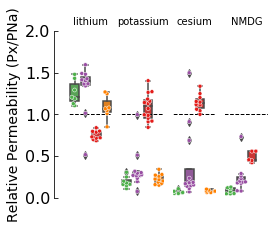

In [111]:
fig = plt.figure(figsize=(4.25, 4)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

sns.swarmplot(x= Lithium['Injection'], y=Lithium['Permeability'], data = Lithium,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])
sns.boxplot(x= Lithium['Injection'], y=Lithium['Permeability'], data = Lithium, palette=sns.color_palette(colorsSINGLES),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])

sns.swarmplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax2, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])
sns.boxplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium, palette=sns.color_palette(colorsSINGLES),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])

sns.swarmplot(x= Cesium['Injection'], y=Cesium['Permeability'], data = Cesium,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax3, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])
sns.boxplot(x= Cesium['Injection'], y=Cesium['Permeability'], data = Cesium, palette=sns.color_palette(colorsSINGLES),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])

sns.swarmplot(x= NMDG['Injection'], y=NMDG['Permeability'], data = NMDG,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax4, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])
sns.boxplot(x= NMDG['Injection'], y=NMDG['Permeability'], data = NMDG, palette=sns.color_palette(colorsSINGLES),ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"])

#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,2]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('lithium',size=10) 
#ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (Px/PNa)', fontsize=14)
#ax1.set_xlabel('lithium',size=10)
ax1.xaxis.set_visible(False)
#ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)

##### AXIS 2 ####
ax2.set_ylim(YlimitPerm)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)  
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)  
ax2.yaxis.set_visible(False)                                   # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['bottom'].set_position(('outward',10))  
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax2.set_title('potassium',size=10) 
ax2.xaxis.set_visible(False)
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)

##### AXIS 3 ####
ax3.set_ylim(YlimitPerm)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)  
ax3.spines['left'].set_visible(False)  
ax3.spines['bottom'].set_visible(False)  
ax3.yaxis.set_visible(False)                                   # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['bottom'].set_position(('outward',10))  
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax3.set_title('cesium',size=10) 
ax3.xaxis.set_visible(False)
#ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)

##### AXIS 4 ####
ax4.set_ylim(YlimitPerm)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)  
ax4.spines['left'].set_visible(False) 
ax4.spines['bottom'].set_visible(False)  
ax4.yaxis.set_visible(False)                                   # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['bottom'].set_position(('outward',10))  
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax4.set_title('NMDG',size=10) 
ax4.xaxis.set_visible(False)


plt.gcf().subplots_adjust(bottom=0.3, left=0.25,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig3-Permeability"+'.eps')
plt.savefig(filedir+"Fig3-Permeability"+'.pdf')
#plt.savefig(filedir+"Fig3-Permeability"+'.jpg')




In [110]:
filedir

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'

# Plot Ratio of Current @-85 mV

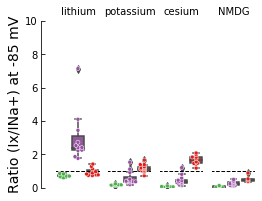

In [75]:
#RATIO Imin85test/IminStart

fig = plt.figure(figsize=(4.25, 4)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

sns.swarmplot(x= Lithium['Injection'], y=Lithium['Ratio'], data = Lithium,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x= Lithium['Injection'], y=Lithium['Ratio'], data = Lithium, palette=sns.color_palette(colorsSINGLES),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012"])

sns.swarmplot(x= Potassium['Injection'], y=Potassium['Ratio'], data = Potassium,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax2, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x= Potassium['Injection'], y=Potassium['Ratio'], data = Potassium, palette=sns.color_palette(colorsSINGLES),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012"])

sns.swarmplot(x= Cesium['Injection'], y=Cesium['Ratio'], data = Cesium,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax3, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x= Cesium['Injection'], y=Cesium['Ratio'], data = Cesium, palette=sns.color_palette(colorsSINGLES),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012"])

sns.swarmplot(x= NMDG['Injection'], y=NMDG['Ratio'], data = NMDG,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax4, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x= NMDG['Injection'], y=NMDG['Ratio'], data = NMDG, palette=sns.color_palette(colorsSINGLES),ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012"])

#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)

YlimitRatio = [-0,10]

##### AXIS 1 ####
ax1.set_ylim(YlimitRatio)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=10)  
ax1.set_title('lithium',size=10) 
#ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Ratio (Ix/INa+) at -85 mV', fontsize=14)
#ax1.set_xlabel('lithium',size=10)
ax1.xaxis.set_visible(False)
#ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)

##### AXIS 2 ####
ax2.set_ylim(YlimitRatio)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)  
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)  
ax2.yaxis.set_visible(False)                                   # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['bottom'].set_position(('outward',10))  
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax2.set_title('potassium',size=10) 
ax2.xaxis.set_visible(False)
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)

##### AXIS 3 ####
ax3.set_ylim(YlimitRatio)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)  
ax3.spines['left'].set_visible(False)  
ax3.yaxis.set_visible(False)      
ax3.spines['bottom'].set_visible(False) 
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['bottom'].set_position(('outward',10))  
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax3.set_title('cesium',size=10) 
ax3.xaxis.set_visible(False)
#ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)

##### AXIS 4 ####
ax4.set_ylim(YlimitRatio)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)  
ax4.spines['left'].set_visible(False) 
ax4.spines['bottom'].set_visible(False) 
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)                                   # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['bottom'].set_position(('outward',10))  
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax4.set_title('NMDG',size=10) 




plt.gcf().subplots_adjust(bottom=0.3, left=0.25,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig3-RatioCurrent-Selectivity"+'.eps')
plt.savefig(filedir+"Fig3-RatioCurrent-Selectivity"+'.pdf')



In [13]:
filedir

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'

In [12]:
InititalCurrent = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.StartSol.isin(["NaGluSel1"]))]
EndCurrent = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.StartSol.isin(["NaGluSel3","NaGluSel4"]))]

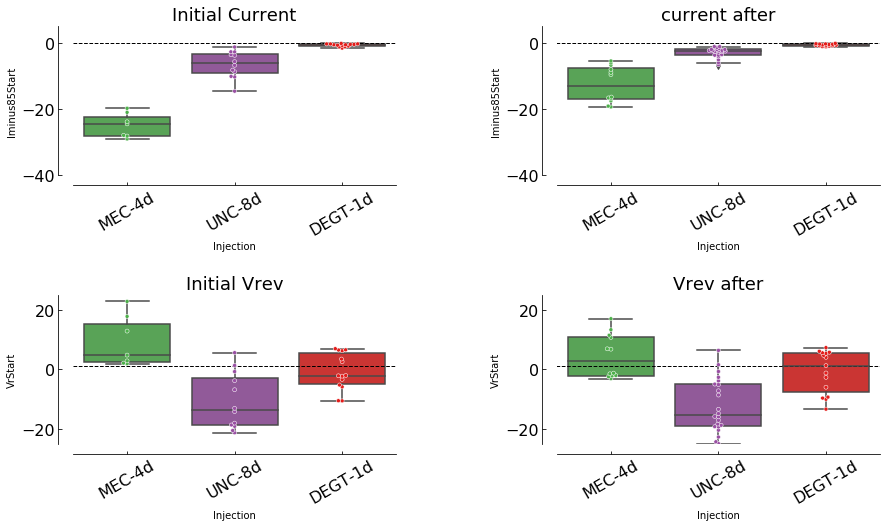

In [13]:
fig = plt.figure(figsize=(16, 10)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)


sns.swarmplot(x= InititalCurrent['Injection'], y=InititalCurrent['Iminus85Start']*1000000*-1, data = InititalCurrent,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x= InititalCurrent['Injection'], y=InititalCurrent['Iminus85Start']*1000000*-1, data = InititalCurrent, palette=sns.color_palette(colorsSINGLES),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012"])

sns.swarmplot(x= EndCurrent['Injection'], y=EndCurrent['Iminus85Start']*1000000*-1, data = EndCurrent,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax2, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x= EndCurrent['Injection'], y=EndCurrent['Iminus85Start']*1000000*-1, data = EndCurrent, palette=sns.color_palette(colorsSINGLES),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012"])

sns.swarmplot(x= InititalCurrent['Injection'], y=InititalCurrent['VrStart']*1000, data = InititalCurrent,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax3, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x= InititalCurrent['Injection'], y=InititalCurrent['VrStart']*1000, data = InititalCurrent, palette=sns.color_palette(colorsSINGLES),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012"])

sns.swarmplot(x= EndCurrent['Injection'], y=EndCurrent['VrStart']*1000, data = EndCurrent,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax4, size = 4,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x= EndCurrent['Injection'], y=EndCurrent['VrStart']*1000, data = EndCurrent, palette=sns.color_palette(colorsSINGLES),ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012"])



##### AXIS 1 ####
ax1.set_ylim([-40, 5])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('Initial Current',size=18) 
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)

##### AXIS 2 ####
ax2.set_ylim([-40, 5])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('current after',size=18) 
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)


##### AXIS 3 ####
ax3.set_ylim([-25, 25])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title('Initial Vrev',size=18) 
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)

##### AXIS 4 ####
ax4.set_ylim([-25, 25])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title('Vrev after',size=18) 
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)


plt.gcf().subplots_adjust(bottom=0.3, left=0.2,hspace=0.8, wspace=0.5) 

plt.savefig(filedir+"Fig3-CurrentOverTime-Selectivity"+'.jpg')

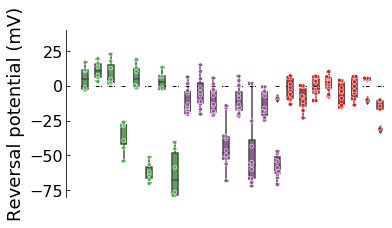

In [107]:
#plot Reversal Potentials
MEC4dLi = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["LiGluSel"]))]
MEC4K = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["KGluSel"]))]
MEC4Cs = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["CsGluSel"]))]
MEC4Nmg = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NmgGluSel"]))]

UNC8dLi = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["LiGluSel"]))]
UNC8dK = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["KGluSel"]))]
UNC8dCs = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["CsGluSel"]))]
UNC8dNmg = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NmgGluSel"]))]

DEGT1dLi = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["LiGluSel"]))]
DEGT1dK = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["KGluSel"]))]
DEGT1dCs = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["CsGluSel"]))]
DEGT1dNmg = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NmgGluSel"]))]


fig = plt.figure(figsize=(6, 4)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,24,1)
ax2 = plt.subplot(1,24,2)
ax3 = plt.subplot(1,24,3)
ax4 = plt.subplot(1,24,4)
ax5 = plt.subplot(1,24,5)
ax6 = plt.subplot(1,24,6)
ax7 = plt.subplot(1,24,7)
ax8 = plt.subplot(1,24,8)
#UNC8
ax9 = plt.subplot(1,24,9)
ax10 = plt.subplot(1,24,10)
ax11= plt.subplot(1,24,11)
ax12 = plt.subplot(1,24,12)
ax13 = plt.subplot(1,24,13)
ax14 = plt.subplot(1,24,14)
ax15 = plt.subplot(1,24,15)
ax16 = plt.subplot(1,24,16)
#DEGT-1
ax17 = plt.subplot(1,24,17)
ax18 = plt.subplot(1,24,18)
ax19= plt.subplot(1,24,19)
ax20 = plt.subplot(1,24,20)
ax21 = plt.subplot(1,24,21)
ax22 = plt.subplot(1,24,22)
ax23 = plt.subplot(1,24,23)
ax24 = plt.subplot(1,24,24)

sns.swarmplot(y=MEC4dLi['VrStart']*1000, data = MEC4dLi,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax1, size = 4)
sns.boxplot(y=MEC4dLi['VrStart']*1000, data = MEC4dLi, palette=sns.color_palette(colorsSINGLES),ax=ax1)

sns.swarmplot(y=MEC4dLi['VrTest']*1000, data = MEC4dLi,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax2, size = 4)
sns.boxplot(y=MEC4dLi['VrTest']*1000, data = MEC4dLi, palette=sns.color_palette(colorsSINGLES),ax=ax2)

sns.swarmplot(y=MEC4K['VrStart']*1000, data = MEC4K,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax3, size = 4)
sns.boxplot(y=MEC4K['VrStart']*1000, data = MEC4K, palette=sns.color_palette(colorsSINGLES),ax=ax3)

sns.swarmplot(y=MEC4K['VrTest']*1000, data = MEC4K,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax4, size = 4)
sns.boxplot(y=MEC4K['VrTest']*1000, data = MEC4K, palette=sns.color_palette(colorsSINGLES),ax=ax4)

sns.swarmplot(y=MEC4Cs['VrStart']*1000, data = MEC4Cs,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax5, size = 4)
sns.boxplot(y=MEC4Cs['VrStart']*1000, data = MEC4Cs, palette=sns.color_palette(colorsSINGLES),ax=ax5)

sns.swarmplot(y=MEC4Cs['VrTest']*1000, data = MEC4Cs,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax6, size = 4)
sns.boxplot(y=MEC4Cs['VrTest']*1000, data = MEC4Cs, palette=sns.color_palette(colorsSINGLES),ax=ax6)

sns.swarmplot(y=MEC4Nmg['VrStart']*1000, data = MEC4Nmg,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax7, size = 4)
sns.boxplot(y=MEC4Nmg['VrStart']*1000, data = MEC4Nmg, palette=sns.color_palette(colorsSINGLES),ax=ax7)

sns.swarmplot(y=MEC4Nmg['VrTest']*1000, data = MEC4Nmg,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, ax = ax8, size = 4)
sns.boxplot(y=MEC4Nmg['VrTest']*1000, data = MEC4Nmg, palette=sns.color_palette(colorsSINGLES),ax=ax8)
####
sns.swarmplot(y=UNC8dLi['VrStart']*1000, data = UNC8dLi,color=colorsSINGLES[1], edgecolor='white', linewidth=0.5, ax = ax9, size = 4)
sns.boxplot(y=UNC8dLi['VrStart']*1000, data = UNC8dLi, color=colorsSINGLES[1],ax=ax9)

sns.swarmplot(y=UNC8dLi['VrTest']*1000, data = UNC8dLi,color=colorsSINGLES[1], edgecolor='white', linewidth=0.5, ax = ax10, size = 4)
sns.boxplot(y=UNC8dLi['VrTest']*1000, data = UNC8dLi, color=colorsSINGLES[1],ax=ax10)

sns.swarmplot(y=UNC8dK['VrStart']*1000, data = UNC8dK,color=colorsSINGLES[1], edgecolor='white', linewidth=0.5, ax = ax11, size = 4)
sns.boxplot(y=UNC8dK['VrStart']*1000, data = UNC8dK, color=colorsSINGLES[1],ax=ax11)

sns.swarmplot(y=UNC8dK['VrTest']*1000, data = UNC8dK,color=colorsSINGLES[1], edgecolor='white', linewidth=0.5, ax = ax12, size = 4)
sns.boxplot(y=UNC8dK['VrTest']*1000, data = UNC8dK, color=colorsSINGLES[1],ax=ax12)

sns.swarmplot(y=UNC8dCs['VrStart']*1000, data = UNC8dCs,color=colorsSINGLES[1], edgecolor='white', linewidth=0.5, ax = ax13, size = 4)
sns.boxplot(y=UNC8dCs['VrStart']*1000, data = UNC8dCs, color=colorsSINGLES[1],ax=ax13)

sns.swarmplot(y=UNC8dCs['VrTest']*1000, data = UNC8dCs,color=colorsSINGLES[1], edgecolor='white', linewidth=0.5, ax = ax14, size = 4)
sns.boxplot(y=UNC8dCs['VrTest']*1000, data = UNC8dCs, color=colorsSINGLES[1],ax=ax14)

sns.swarmplot(y=UNC8dNmg['VrStart']*1000, data = UNC8dNmg,color=colorsSINGLES[1], edgecolor='white', linewidth=0.5, ax = ax15, size = 4)
sns.boxplot(y=UNC8dNmg['VrStart']*1000, data = UNC8dNmg, color=colorsSINGLES[1],ax=ax15)

sns.swarmplot(y=UNC8dNmg['VrTest']*1000, data = UNC8dNmg,color=colorsSINGLES[1], edgecolor='white', linewidth=0.5, ax = ax16, size = 4)
sns.boxplot(y=UNC8dNmg['VrTest']*1000, data = UNC8dNmg, color=colorsSINGLES[1],ax=ax16)

###DEGT1
sns.swarmplot(y=DEGT1dLi['VrStart']*1000, data = DEGT1dLi,color=colorsSINGLES[2], edgecolor='white', linewidth=0.5, ax = ax17, size = 4)
sns.boxplot(y=DEGT1dLi['VrStart']*1000, data = DEGT1dLi, color=colorsSINGLES[2],ax=ax17)

sns.swarmplot(y=DEGT1dLi['VrTest']*1000, data = DEGT1dLi,color=colorsSINGLES[2], edgecolor='white', linewidth=0.5, ax = ax18, size = 4)
sns.boxplot(y=DEGT1dLi['VrTest']*1000, data = DEGT1dLi, color=colorsSINGLES[2],ax=ax18)

sns.swarmplot(y=DEGT1dK['VrStart']*1000, data = DEGT1dK,color=colorsSINGLES[2], edgecolor='white', linewidth=0.5, ax = ax19, size = 4)
sns.boxplot(y=DEGT1dK['VrStart']*1000, data = DEGT1dK, color=colorsSINGLES[2],ax=ax19)

sns.swarmplot(y=DEGT1dK['VrTest']*1000, data = DEGT1dK,color=colorsSINGLES[2], edgecolor='white', linewidth=0.5, ax = ax20, size = 4)
sns.boxplot(y=DEGT1dK['VrTest']*1000, data = DEGT1dK, color=colorsSINGLES[2],ax=ax20)

sns.swarmplot(y=DEGT1dCs['VrStart']*1000, data = DEGT1dCs,color=colorsSINGLES[2], edgecolor='white', linewidth=0.5, ax = ax21, size = 4)
sns.boxplot(y=DEGT1dCs['VrStart']*1000, data = DEGT1dCs, color=colorsSINGLES[2],ax=ax21)

sns.swarmplot(y=DEGT1dCs['VrTest']*1000, data = DEGT1dCs,color=colorsSINGLES[2], edgecolor='white', linewidth=0.5, ax = ax22, size = 4)
sns.boxplot(y=DEGT1dCs['VrTest']*1000, data = DEGT1dCs, color=colorsSINGLES[2],ax=ax22)

sns.swarmplot(y=DEGT1dNmg['VrStart']*1000, data = DEGT1dNmg,color=colorsSINGLES[2], edgecolor='white', linewidth=0.5, ax = ax23, size = 4)
sns.boxplot(y=DEGT1dNmg['VrStart']*1000, data = DEGT1dNmg, color=colorsSINGLES[2],ax=ax23)

sns.swarmplot(y=DEGT1dNmg['VrTest']*1000, data = DEGT1dNmg,color=colorsSINGLES[2], edgecolor='white', linewidth=0.5, ax = ax24, size = 4)
sns.boxplot(y=DEGT1dNmg['VrTest']*1000, data = DEGT1dNmg, color=colorsSINGLES[2],ax=ax24)


Ylimit = [-80, 40]
ZeroLine = [0,0]


##### AXIS 1 ####
ax1.set_ylim(Ylimit)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], ZeroLine , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
#ax1.set_title('Na/Lithium',size=18) 
#ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax1.xaxis.set_visible(False)
ax1.spines['bottom'].set_visible(False)  
ax1.set_ylabel('Reversal potential (mV)', fontsize=18)

##### AXIS 2 ####
ax2.set_ylim(Ylimit)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)  
ax2.spines['left'].set_visible(False)  
ax2.yaxis.set_visible(False)                                   # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['bottom'].set_position(('outward',10))  
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax2.xaxis.set_visible(False)
ax2.spines['bottom'].set_visible(False) 

##### AXIS 3 ####
ax3.set_ylim(Ylimit)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)  
ax3.spines['left'].set_visible(False)  
ax3.yaxis.set_visible(False)                                   # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['bottom'].set_position(('outward',10))  
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax3.xaxis.set_visible(False)
ax3.spines['bottom'].set_visible(False) 

##### AXIS 4 ####
ax4.set_ylim(Ylimit)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)  
ax4.spines['left'].set_visible(False)  
ax4.yaxis.set_visible(False)                                   # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['bottom'].set_position(('outward',10))  
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax4.xaxis.set_visible(False)
ax4.spines['bottom'].set_visible(False) 

##### AXIS 5 ####
ax5.set_ylim(Ylimit)
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)  
ax5.spines['left'].set_visible(False)  
ax5.yaxis.set_visible(False)                                   # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['bottom'].set_position(('outward',10))  
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax5.xaxis.set_visible(False)
ax5.spines['bottom'].set_visible(False) 

##### AXIS 6 ####
ax6.set_ylim(Ylimit)
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)  
ax6.spines['left'].set_visible(False)  
ax6.yaxis.set_visible(False)                                   # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['bottom'].set_position(('outward',10))  
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax6.xaxis.set_visible(False)
ax6.spines['bottom'].set_visible(False) 

##### AXIS 7 ####
ax7.set_ylim(Ylimit)
ax7.spines['right'].set_visible(False)                                  # no spine at the right
ax7.spines['top'].set_visible(False)  
ax7.spines['left'].set_visible(False)  
ax7.yaxis.set_visible(False)                                   # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['bottom'].set_position(('outward',10))  
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
ax7.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax7.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax7.xaxis.set_visible(False)
ax7.spines['bottom'].set_visible(False) 

##### AXIS 7 ####
ax8.set_ylim(Ylimit)
ax8.spines['right'].set_visible(False)                                  # no spine at the right
ax8.spines['top'].set_visible(False)  
ax8.spines['left'].set_visible(False)  
ax8.yaxis.set_visible(False)                                   # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['bottom'].set_position(('outward',10))  
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
ax8.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax8.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax8.xaxis.set_visible(False)
ax8.spines['bottom'].set_visible(False) 

##### AXIS 9 ####
ax9.set_ylim(Ylimit)
ax9.spines['right'].set_visible(False)                                  # no spine at the right
ax9.spines['top'].set_visible(False)  
ax9.spines['left'].set_visible(False)  
ax9.yaxis.set_visible(False)                                   # ticks at the left
ax9.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax9.spines['bottom'].set_position(('outward',10))  
ax9.get_yaxis().set_tick_params(direction='in')
ax9.get_xaxis().set_tick_params(direction='in')
ax9.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax9.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax9.xaxis.set_visible(False)
ax9.spines['bottom'].set_visible(False) 

##### AXIS 10 ####
ax10.set_ylim(Ylimit)
ax10.spines['right'].set_visible(False)                                  # no spine at the right
ax10.spines['top'].set_visible(False)  
ax10.spines['left'].set_visible(False)  
ax10.yaxis.set_visible(False)                                   # ticks at the left
ax10.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax10.spines['bottom'].set_position(('outward',10))  
ax10.get_yaxis().set_tick_params(direction='in')
ax10.get_xaxis().set_tick_params(direction='in')
ax10.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax10.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax10.xaxis.set_visible(False)
ax10.spines['bottom'].set_visible(False) 

##### AXIS 11 ####
ax11.set_ylim(Ylimit)
ax11.spines['right'].set_visible(False)                                  # no spine at the right
ax11.spines['top'].set_visible(False)  
ax11.spines['left'].set_visible(False)  
ax11.yaxis.set_visible(False)                                   # ticks at the left
ax11.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax11.spines['bottom'].set_position(('outward',10))  
ax11.get_yaxis().set_tick_params(direction='in')
ax11.get_xaxis().set_tick_params(direction='in')
ax11.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax11.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax11.xaxis.set_visible(False)
ax11.spines['bottom'].set_visible(False)

##### AXIS 12 ####
ax12.set_ylim(Ylimit)
ax12.spines['right'].set_visible(False)                                  # no spine at the right
ax12.spines['top'].set_visible(False)  
ax12.spines['left'].set_visible(False)  
ax12.yaxis.set_visible(False)                                   # ticks at the left
ax12.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax12.spines['bottom'].set_position(('outward',10))  
ax12.get_yaxis().set_tick_params(direction='in')
ax12.get_xaxis().set_tick_params(direction='in')
ax12.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax12.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax12.xaxis.set_visible(False)
ax12.spines['bottom'].set_visible(False)

#### AXIS 13 ####
ax13.set_ylim(Ylimit)
ax13.spines['right'].set_visible(False)                                  # no spine at the right
ax13.spines['top'].set_visible(False)  
ax13.spines['left'].set_visible(False)  
ax13.yaxis.set_visible(False)                                   # ticks at the left
ax13.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax13.spines['bottom'].set_position(('outward',10))  
ax13.get_yaxis().set_tick_params(direction='in')
ax13.get_xaxis().set_tick_params(direction='in')
ax13.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax13.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax13.xaxis.set_visible(False)
ax13.spines['bottom'].set_visible(False)

##### AXIS 14 ####
ax14.set_ylim(Ylimit)
ax14.spines['right'].set_visible(False)                                  # no spine at the right
ax14.spines['top'].set_visible(False)  
ax14.spines['left'].set_visible(False)  
ax14.yaxis.set_visible(False)                                   # ticks at the left
ax14.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax14.spines['bottom'].set_position(('outward',10))  
ax14.get_yaxis().set_tick_params(direction='in')
ax14.get_xaxis().set_tick_params(direction='in')
ax14.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax14.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax14.xaxis.set_visible(False)
ax14.spines['bottom'].set_visible(False)

#### AXIS 15 ####
ax15.set_ylim(Ylimit)
ax15.spines['right'].set_visible(False)                                  # no spine at the right
ax15.spines['top'].set_visible(False)  
ax15.spines['left'].set_visible(False)  
ax15.yaxis.set_visible(False)                                   # ticks at the left
ax15.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax15.spines['bottom'].set_position(('outward',10))  
ax15.get_yaxis().set_tick_params(direction='in')
ax15.get_xaxis().set_tick_params(direction='in')
ax15.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax15.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax15.xaxis.set_visible(False)
ax15.spines['bottom'].set_visible(False)

##### AXIS 16 ####
ax16.set_ylim(Ylimit)
ax16.spines['right'].set_visible(False)                                  # no spine at the right
ax16.spines['top'].set_visible(False)  
ax16.spines['left'].set_visible(False)  
ax16.yaxis.set_visible(False)                                   # ticks at the left
ax16.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax16.spines['bottom'].set_position(('outward',10))  
ax16.get_yaxis().set_tick_params(direction='in')
ax16.get_xaxis().set_tick_params(direction='in')
ax16.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax16.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax16.xaxis.set_visible(False)
ax16.spines['bottom'].set_visible(False)

#### AXIS 17 ####
ax17.set_ylim(Ylimit)
ax17.spines['right'].set_visible(False)                                  # no spine at the right
ax17.spines['top'].set_visible(False)  
ax17.spines['left'].set_visible(False)  
ax17.yaxis.set_visible(False)                                   # ticks at the left
ax17.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax17.spines['bottom'].set_position(('outward',10))  
ax17.get_yaxis().set_tick_params(direction='in')
ax17.get_xaxis().set_tick_params(direction='in')
ax17.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax17.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax17.xaxis.set_visible(False)
ax17.spines['bottom'].set_visible(False)

##### AXIS 18 ####
ax18.set_ylim(Ylimit)
ax18.spines['right'].set_visible(False)                                  # no spine at the right
ax18.spines['top'].set_visible(False)  
ax18.spines['left'].set_visible(False)  
ax18.yaxis.set_visible(False)                                   # ticks at the left
ax18.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax18.spines['bottom'].set_position(('outward',10))  
ax18.get_yaxis().set_tick_params(direction='in')
ax18.get_xaxis().set_tick_params(direction='in')
ax18.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax18.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax18.xaxis.set_visible(False)
ax18.spines['bottom'].set_visible(False)

#### AXIS 19 ####
ax19.set_ylim(Ylimit)
ax19.spines['right'].set_visible(False)                                  # no spine at the right
ax19.spines['top'].set_visible(False)  
ax19.spines['left'].set_visible(False)  
ax19.yaxis.set_visible(False)                                   # ticks at the left
ax19.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax19.spines['bottom'].set_position(('outward',10))  
ax19.get_yaxis().set_tick_params(direction='in')
ax19.get_xaxis().set_tick_params(direction='in')
ax19.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax19.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax19.xaxis.set_visible(False)
ax19.spines['bottom'].set_visible(False)

##### AXIS 20 ####
ax20.set_ylim(Ylimit)
ax20.spines['right'].set_visible(False)                                  # no spine at the right
ax20.spines['top'].set_visible(False)  
ax20.spines['left'].set_visible(False)  
ax20.yaxis.set_visible(False)                                   # ticks at the left
ax20.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax20.spines['bottom'].set_position(('outward',10))  
ax20.get_yaxis().set_tick_params(direction='in')
ax20.get_xaxis().set_tick_params(direction='in')
ax20.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax20.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax20.xaxis.set_visible(False)
ax20.spines['bottom'].set_visible(False)

#### AXIS 21 ####
ax21.set_ylim(Ylimit)
ax21.spines['right'].set_visible(False)                                  # no spine at the right
ax21.spines['top'].set_visible(False)  
ax21.spines['left'].set_visible(False)  
ax21.yaxis.set_visible(False)                                   # ticks at the left
ax21.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax21.spines['bottom'].set_position(('outward',10))  
ax21.get_yaxis().set_tick_params(direction='in')
ax21.get_xaxis().set_tick_params(direction='in')
ax21.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax21.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax21.xaxis.set_visible(False)
ax21.spines['bottom'].set_visible(False)

##### AXIS 22 ####
ax22.set_ylim(Ylimit)
ax22.spines['right'].set_visible(False)                                  # no spine at the right
ax22.spines['top'].set_visible(False)  
ax22.spines['left'].set_visible(False)  
ax22.yaxis.set_visible(False)                                   # ticks at the left
ax22.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax22.spines['bottom'].set_position(('outward',10))  
ax22.get_yaxis().set_tick_params(direction='in')
ax22.get_xaxis().set_tick_params(direction='in')
ax22.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax22.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax22.xaxis.set_visible(False)
ax22.spines['bottom'].set_visible(False)

#### AXIS 23 ####
ax23.set_ylim(Ylimit)
ax23.spines['right'].set_visible(False)                                  # no spine at the right
ax23.spines['top'].set_visible(False)  
ax23.spines['left'].set_visible(False)  
ax23.yaxis.set_visible(False)                                   # ticks at the left
ax23.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax23.spines['bottom'].set_position(('outward',10))  
ax23.get_yaxis().set_tick_params(direction='in')
ax23.get_xaxis().set_tick_params(direction='in')
ax23.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax23.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax23.xaxis.set_visible(False)
ax23.spines['bottom'].set_visible(False)

##### AXIS 24 ####
ax24.set_ylim(Ylimit)
ax24.spines['right'].set_visible(False)                                  # no spine at the right
ax24.spines['top'].set_visible(False)  
ax24.spines['left'].set_visible(False)
#ax24.spines['bottom'].set_visible(False) 
ax24.yaxis.set_visible(False)                                   # ticks at the left
ax24.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax24.spines['bottom'].set_position(('outward',10))  
ax24.get_yaxis().set_tick_params(direction='in')
ax24.get_xaxis().set_tick_params(direction='in')
ax24.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax24.tick_params(axis='both', which='major', labelsize=16)  
#ax3.set_title('Na/cesium',size=18) 
#ax6.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d"],rotation=30)
ax24.xaxis.set_visible(False)
ax24.spines['bottom'].set_visible(False)


    
plt.gcf().subplots_adjust(bottom=0.3, left=0.2,hspace=0.75, wspace=0.7) 
plt.savefig(filedir+"Fig3-Vrev-Selectivity"+'.eps')




In [34]:
filedir

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'